In [69]:
import pandas as pd
import pandas_datareader as wb
from datetime import datetime
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression

# Select dates to analyze.
fromDate = "01/01/1948"
toDate = "12/31/2022"

# Import from FRED (Inflation & Unemployement).
Inflation = wb.DataReader('CPIAUCSL', 'fred', fromDate, toDate)
UnRate = wb.DataReader('UNRATE', 'fred', fromDate, toDate)
FedRate = wb.DataReader('DFF', 'fred', fromDate, toDate)

# Import S&P 500 Index data.
spy = "SPY.csv"
spy = pd.read_csv(spy)
spy = spy.rename(columns={'Date': 'DATE', 'Adj Close': 'SPY'})
spy['DATE'] = pd.to_datetime(spy['DATE'])
spy = spy.set_index(['DATE'])
spy = spy.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Calculate Inflation Rate.
Inflation['INFRATE'] = ((Inflation['CPIAUCSL'] - Inflation['CPIAUCSL'].shift(12)) / Inflation['CPIAUCSL'].shift(12)) * 100

Inflation = Inflation.dropna()
UnRate = UnRate.dropna()

# Merge Inflation & FedRate data with UnRate data.
dataframe = Inflation.join(UnRate, how="inner")
dataframe = dataframe.join(FedRate, how="inner")
dataframe = dataframe.dropna()

# Merge S&P 500 Index data
other_df = dataframe.join(spy, how="inner")
other_df = other_df.dropna()

dataframe = dataframe.reset_index()

print(dataframe.head())

        DATE  CPIAUCSL   INFRATE  UNRATE   DFF
0 1954-07-01     26.86  0.261292     5.8  1.13
1 1954-08-01     26.85  0.000000     6.0  0.25
2 1954-09-01     26.81 -0.297508     6.1  1.44
3 1954-10-01     26.72 -0.853432     5.7  0.50
4 1954-11-01     26.78 -0.260708     5.3  1.38


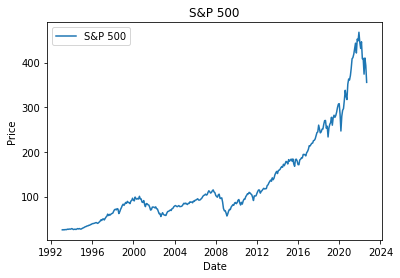

In [38]:
x_axis = df['DATE'].values
y_axis1 = df['SPY'].values

# Create the plot.
plt.plot(x_axis, y_axis1, label = "S&P 500")
# plt.plot(x_axis, y_axis2, label = "Unemployement")
# Create labels for the x and y axes.
plt.xlabel("Date")
plt.ylabel("Price")
# Create a title.
plt.title("S&P 500")
# Add a grid.
# plt.grid()
# Add the legend.
plt.legend()
plt.savefig("sp500",dpi= 300, bbox_inches='tight')
plt.show()

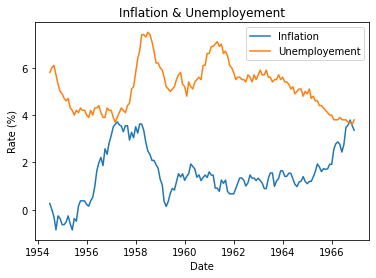

                            OLS Regression Results                            
Dep. Variable:                INFRATE   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.582
Date:                Mon, 17 Oct 2022   Prob (F-statistic):              0.110
Time:                        23:00:20   Log-Likelihood:                -225.96
No. Observations:                 150   AIC:                             455.9
Df Residuals:                     148   BIC:                             461.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2862      0.483      4.729      0.0

In [45]:
start_date = "01/01/1948"
end_date = "12/31/1966"
df = dataframe[(dataframe['DATE'] > start_date) & (dataframe['DATE'] < end_date)]

x_axis = df['DATE'].values
y_axis1 = df['INFRATE'].values
y_axis2 = df['UNRATE'].values

# Create the plot.
plt.plot(x_axis, y_axis1, label = "Inflation")
plt.plot(x_axis, y_axis2, label = "Unemployement")
# Create labels for the x and y axes.
plt.xlabel("Date")
plt.ylabel("Rate (%)")

# Create a title.
plt.title("Inflation & Unemployement")
# Add a grid.
# plt.grid()
# Add the legend.
plt.legend()
plt.savefig("inflation_unemployment_1",dpi= 300, bbox_inches='tight')
plt.show()

uni_mod = smf.ols(formula="INFRATE ~ UNRATE", data = df)
uni_result = uni_mod.fit()
print(uni_result.summary())

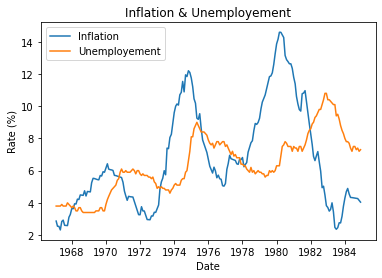

                            OLS Regression Results                            
Dep. Variable:                INFRATE   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.374
Date:                Mon, 17 Oct 2022   Prob (F-statistic):             0.0214
Time:                        23:00:21   Log-Likelihood:                -549.38
No. Observations:                 215   AIC:                             1103.
Df Residuals:                     213   BIC:                             1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0465      0.761      6.634      0.0

In [46]:
start_date = "01/01/1967"
end_date = "12/31/1984"
df = dataframe[(dataframe['DATE'] > start_date) & (dataframe['DATE'] < end_date)]

x_axis = df['DATE'].values
y_axis1 = df['INFRATE'].values
y_axis2 = df['UNRATE'].values

# Create the plot.
plt.plot(x_axis, y_axis1, label = "Inflation")
plt.plot(x_axis, y_axis2, label = "Unemployement")
# Create labels for the x and y axes.
plt.xlabel("Date")
plt.ylabel("Rate (%)")

# Create a title.
plt.title("Inflation & Unemployement")
# Add a grid.
# plt.grid()
# Add the legend.
plt.legend()
plt.savefig("inflation_unemployment_2",dpi= 300, bbox_inches='tight')
plt.show()

uni_mod = smf.ols(formula="INFRATE ~ UNRATE", data = df)
uni_result = uni_mod.fit()
print(uni_result.summary())

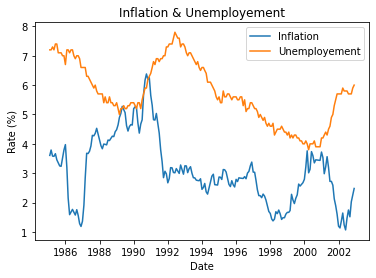

                            OLS Regression Results                            
Dep. Variable:                INFRATE   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.062
Date:                Mon, 17 Oct 2022   Prob (F-statistic):              0.152
Time:                        23:00:21   Log-Likelihood:                -331.00
No. Observations:                 215   AIC:                             666.0
Df Residuals:                     213   BIC:                             672.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4887      0.431      5.768      0.0

In [47]:
start_date = "01/01/1985"
end_date = "12/31/2002"
df = dataframe[(dataframe['DATE'] > start_date) & (dataframe['DATE'] < end_date)]

x_axis = df['DATE'].values
y_axis1 = df['INFRATE'].values
y_axis2 = df['UNRATE'].values

# Create the plot.
plt.plot(x_axis, y_axis1, label = "Inflation")
plt.plot(x_axis, y_axis2, label = "Unemployement")
# plt.plot(x_axis, y_axis3, label = "S&P 500")
# Create labels for the x and y axes.
plt.xlabel("Date")
plt.ylabel("Rate (%)")

# Create a title.
plt.title("Inflation & Unemployement")
# Add a grid.
# plt.grid()
# Add the legend.
plt.legend()
plt.savefig("inflation_unemployment_3",dpi= 300, bbox_inches='tight')
plt.show()

uni_mod = smf.ols(formula="INFRATE ~ UNRATE", data = df)
uni_result = uni_mod.fit()
print(uni_result.summary())

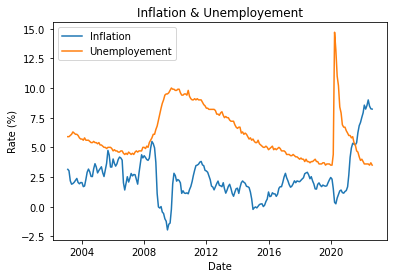

                            OLS Regression Results                            
Dep. Variable:                INFRATE   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     40.45
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.05e-09
Time:                        23:00:22   Log-Likelihood:                -458.12
No. Observations:                 236   AIC:                             920.2
Df Residuals:                     234   BIC:                             927.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5071      0.346     13.018      0.0

In [48]:
start_date = "01/01/2003"
end_date = "12/31/2022"
df = dataframe[(dataframe['DATE'] > start_date) & (dataframe['DATE'] < end_date)]

x_axis = df['DATE'].values
y_axis1 = df['INFRATE'].values
y_axis2 = df['UNRATE'].values

# Create the plot.
plt.plot(x_axis, y_axis1, label = "Inflation")
plt.plot(x_axis, y_axis2, label = "Unemployement")
# plt.plot(x_axis, y_axis3, label = "S&P 500")
# Create labels for the x and y axes.
plt.xlabel("Date")
plt.ylabel("Rate (%)")

# Create a title.
plt.title("Inflation & Unemployement")
# Add a grid.
# plt.grid()
# Add the legend.
plt.legend()
plt.savefig("inflation_unemployment_4",dpi= 300, bbox_inches='tight')
plt.show()

uni_mod = smf.ols(formula="INFRATE ~ UNRATE", data = df)
uni_result = uni_mod.fit()
print(uni_result.summary())

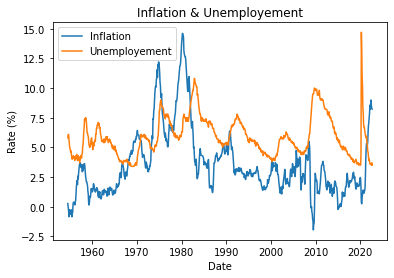

                            OLS Regression Results                            
Dep. Variable:                INFRATE   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     8.767
Date:                Mon, 17 Oct 2022   Prob (F-statistic):            0.00316
Time:                        23:00:23   Log-Likelihood:                -2008.1
No. Observations:                 819   AIC:                             4020.
Df Residuals:                     817   BIC:                             4030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5340      0.363      6.971      0.0

In [49]:
start_date = "01/01/1948"
end_date = "12/31/2022"
df = dataframe[(dataframe['DATE'] > start_date) & (dataframe['DATE'] < end_date)]

x_axis = df['DATE'].values
y_axis1 = df['INFRATE'].values
y_axis2 = df['UNRATE'].values

# Create the plot.
plt.plot(x_axis, y_axis1, label = "Inflation")
plt.plot(x_axis, y_axis2, label = "Unemployement")
# plt.plot(x_axis, y_axis3, label = "S&P 500")
# Create labels for the x and y axes.
plt.xlabel("Date")
plt.ylabel("Rate (%)")

# Create a title.
plt.title("Inflation & Unemployement")
# Add a grid.
# plt.grid()
# Add the legend.
plt.legend()
plt.savefig("inflation_unemployment_5",dpi= 300, bbox_inches='tight')
plt.show()

uni_mod = smf.ols(formula="INFRATE ~ UNRATE", data = df)
uni_result = uni_mod.fit()
print(uni_result.summary())

In [65]:
other_df

,DATE,CPIAUCSL,INFRATE,UNRATE,DFF,SPY
0,1993-02-01,143.100,3.246753,7.1,3.25,25.604298
1,1993-03-01,143.300,3.019410,7.0,3.65,26.054773
2,1993-04-01,143.800,3.156385,7.1,3.31,25.507984
3,1993-05-01,144.200,3.221188,7.1,3.01,26.195919
4,1993-06-01,144.300,2.997859,7.0,3.33,26.105413
...,...,...,...,...,...,...
351,2022-05-01,291.474,8.516413,3.6,0.33,409.471893
352,2022-06-01,295.328,8.995221,3.6,0.83,374.090698
353,2022-07-01,295.271,8.482130,3.5,1.58,410.304535
354,2022-08-01,295.620,8.249235,3.7,2.33,393.563293


In [71]:
uni_mod = smf.ols(formula="INFRATE ~ UNRATE + DFF + SPY", data = other_df)
uni_result = uni_mod.fit()
print(uni_result.summary())

                            OLS Regression Results                            
Dep. Variable:                INFRATE   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     35.86
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           3.03e-20
Time:                        23:10:04   Log-Likelihood:                -610.30
No. Observations:                 356   AIC:                             1229.
Df Residuals:                     352   BIC:                             1244.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2686      0.517      2.456      0.0